In [41]:
from pathlib import Path
import random
import re

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
PATH = "../data/raw/ml2023-r1-dataset/"

In [4]:
files = list(Path(PATH).rglob("*.txt"))

len(files)

21738

In [7]:
code_files = list(filter(lambda x: x.stem.endswith("CODE"), files))
other_files = list(filter(lambda x: x.stem.endswith("OTHER"), files))

len(code_files), len(other_files)

(1969, 19769)

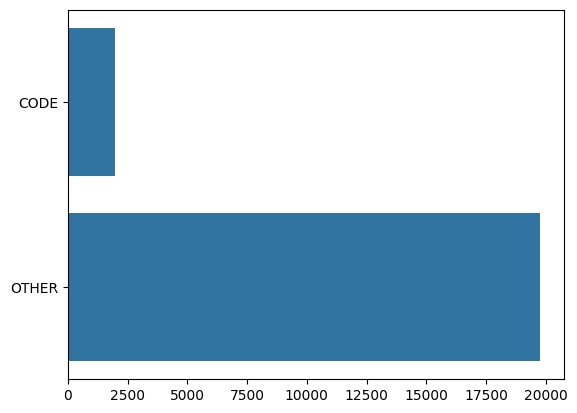

In [14]:
sns.barplot(x=[len(code_files), len(other_files)],
            y=["CODE", "OTHER"]);

In [22]:
data = pd.DataFrame(
    [(c, "code") for c in code_files] + 
    [(c, "other") for c in random.choices(other_files, k=len(code_files))],
    columns=["path", "label"])

data.shape

(3938, 2)

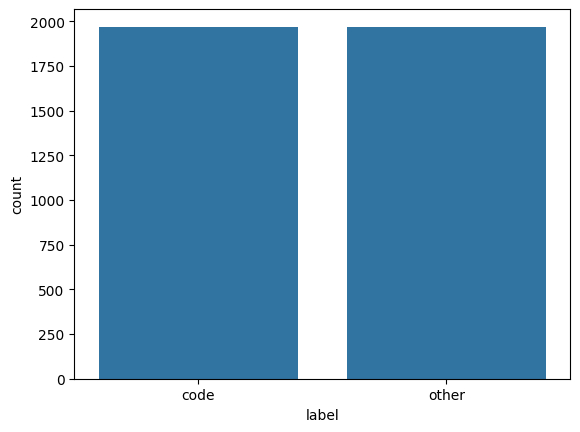

In [24]:
sns.barplot(data["label"].value_counts());

In [43]:
data["num_chars"] = data["path"].apply(lambda x: len(x.read_text()))

data["num_lines"] = data["path"].apply(lambda x: len(re.split("\n+", x.read_text())))

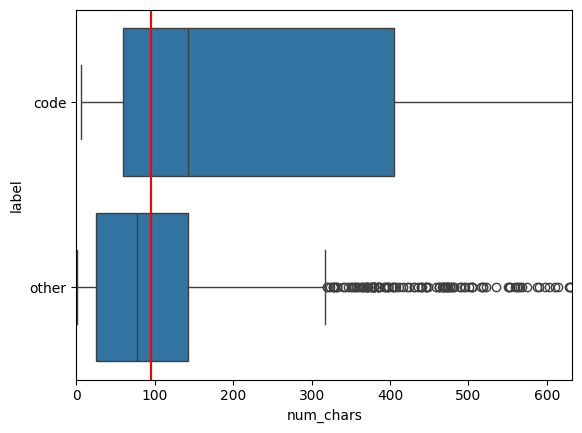

In [50]:
sns.boxplot(x=data["num_chars"], y=data["label"]);
plt.xlim(0, data["num_chars"].quantile(0.9));
plt.axvline(data["num_chars"].median(), color="red");

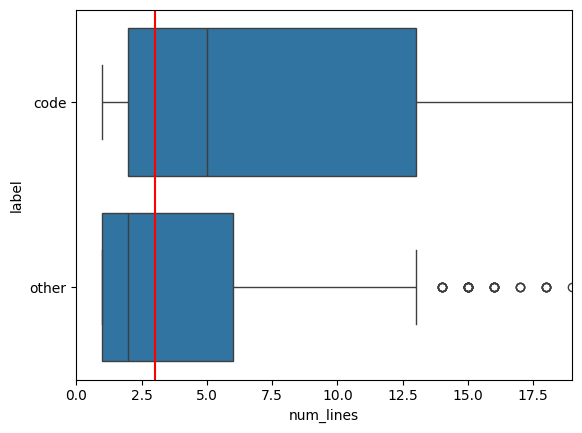

In [48]:
sns.boxplot(x=data["num_lines"], y=data["label"]);
plt.xlim(0, data["num_lines"].quantile(0.9));
plt.axvline(data["num_lines"].median(), color='red');